In [33]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt


Q2

In [12]:
#import datasets
seasonal_path = '/Users/markoshea/Desktop/Working Directories/Datasets/Case-shiller-20-city-seasonal.csv'
nonseasonal_path = '/Users/markoshea/Desktop/Working Directories/Datasets/Case-shiller-20-city-nonseasonal.csv'

seasonal_df = pd.read_csv(seasonal_path) #Case-Shiller 20-city Composite Home Price Index (Seasonal)
nonseasonal_df = pd.read_csv(nonseasonal_path) #Case-Shiller 20-city Composite Home Price Index (Non-seasonal)

In [13]:
#glance at seasonal data
print(seasonal_df)

    observation_date   SPCS20RSA
0         2000-01-01  100.589697
1         2000-02-01  101.692479
2         2000-03-01  102.783828
3         2000-04-01  103.996444
4         2000-05-01  105.252818
..               ...         ...
293       2024-06-01  330.475554
294       2024-07-01  331.402893
295       2024-08-01  332.510348
296       2024-09-01  333.225762
297       2024-10-01  334.288045

[298 rows x 2 columns]


In [14]:
#glance at nonseasonal data
print(nonseasonal_df)

    observation_date  SPCS20RNSA
0         2000-01-01  100.000000
1         2000-02-01  100.757407
2         2000-03-01  101.945281
3         2000-04-01  103.501369
4         2000-05-01  105.197072
..               ...         ...
293       2024-06-01  335.704732
294       2024-07-01  335.842568
295       2024-08-01  334.780286
296       2024-09-01  333.715215
297       2024-10-01  332.942648

[298 rows x 2 columns]


In [18]:
#compute seasonal growth rate df
seasonal_df['Growth_rate'] = np.log(seasonal_df['SPCS20RSA']) - np.log(seasonal_df['SPCS20RSA'].shift(1))
seasonal_df.dropna(inplace=True)
print(seasonal_df)

    observation_date   SPCS20RSA  Growth_rate
2         2000-03-01  102.783828     0.010675
3         2000-04-01  103.996444     0.011729
4         2000-05-01  105.252818     0.012009
5         2000-06-01  106.402524     0.010864
6         2000-07-01  107.134019     0.006851
..               ...         ...          ...
293       2024-06-01  330.475554     0.004915
294       2024-07-01  331.402893     0.002802
295       2024-08-01  332.510348     0.003336
296       2024-09-01  333.225762     0.002149
297       2024-10-01  334.288045     0.003183

[296 rows x 3 columns]


In [21]:
#compute nonseasonal growth rate df
nonseasonal_df['Growth_rate'] = np.log(nonseasonal_df['SPCS20RNSA']) - np.log(nonseasonal_df['SPCS20RNSA'].shift(1))
nonseasonal_df.dropna(inplace=True)
print(nonseasonal_df)

    observation_date  SPCS20RNSA  Growth_rate
1         2000-02-01  100.757407     0.007546
2         2000-03-01  101.945281     0.011720
3         2000-04-01  103.501369     0.015149
4         2000-05-01  105.197072     0.016251
5         2000-06-01  106.757314     0.014723
..               ...         ...          ...
293       2024-06-01  335.704732     0.006149
294       2024-07-01  335.842568     0.000411
295       2024-08-01  334.780286    -0.003168
296       2024-09-01  333.715215    -0.003186
297       2024-10-01  332.942648    -0.002318

[297 rows x 3 columns]


In [26]:
#prep data series
seasonal_growth_df = seasonal_df['SPCS20RSA'].dropna()
nonseasonal_growth_df = nonseasonal_df['SPCS20RNSA'].dropna()

In [29]:
seasonal_growth_acf = acf(seasonal_growth_df, nlags=48, fft=True)
nonseasonal_growth_acf = acf(nonseasonal_growth_df, nlags=48, fft=True)

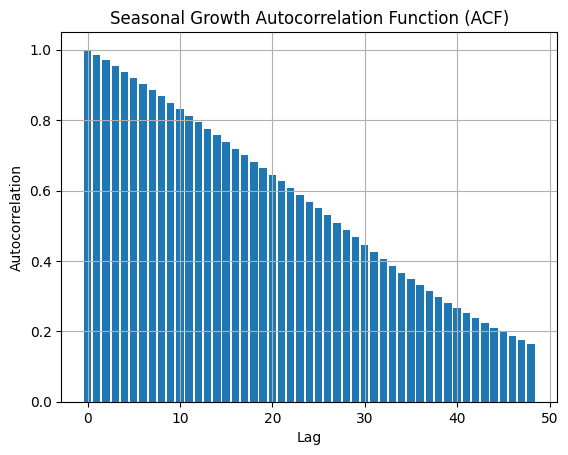

In [41]:
#plot seasonal growth ACF
plt.bar(range(len(seasonal_growth_acf)), seasonal_growth_acf)
plt.title('Seasonal Growth Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

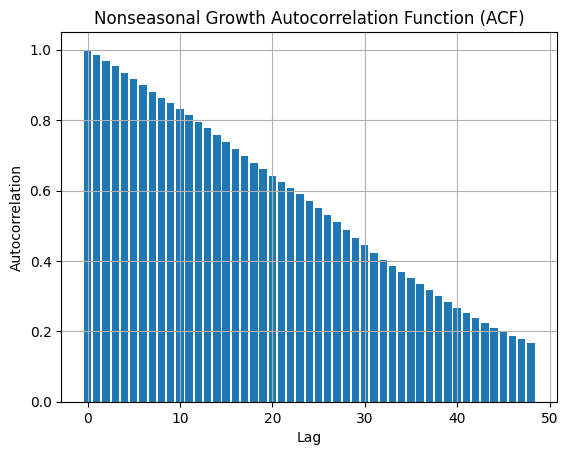

In [42]:
#plot seasonal growth ACF
plt.bar(range(len(nonseasonal_growth_acf)), nonseasonal_growth_acf)
plt.title('Nonseasonal Growth Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

Q3

In [49]:
#simulate 100 draws from y_t = 0.1 + 0.99 * y_(t-1) + epsilon_t for epsilon_t iid N(0, 0.5^2)
n = 100
Y = np.zeros(n) 

sigma = 0.5
np.random.seed(1183)
epsilon = np.random.normal(0, sigma, n)  #white noise

for t in range(1, n):
    Y[t] = 0.1 + 0.99 * Y[t - 1] + epsilon[t]

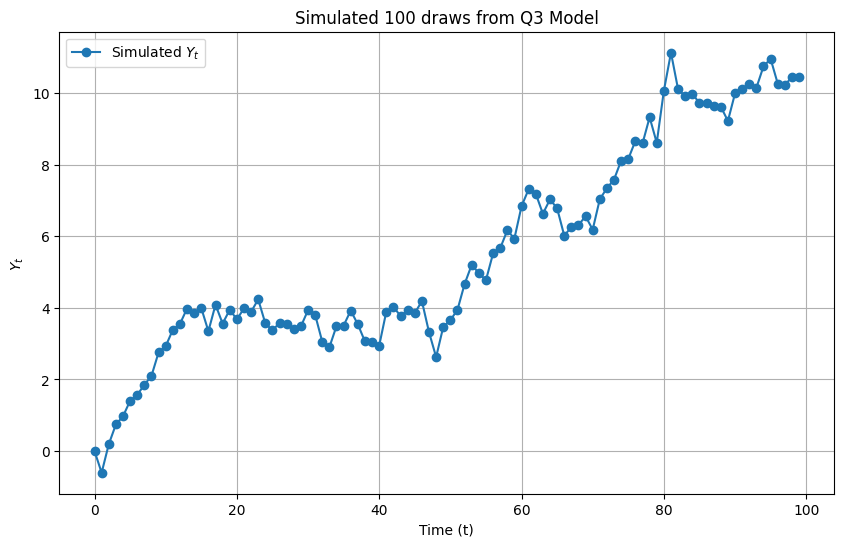

In [50]:
#100 simulations plot
plt.figure(figsize=(10, 6))
plt.plot(Y, marker='o', label="Simulated $Y_t$")
plt.title("Simulated 100 draws from Q3 Model")
plt.xlabel("Time (t)")
plt.ylabel("$Y_t$")
plt.grid()
plt.legend()
plt.show()